<a href="https://colab.research.google.com/github/Haseeb227/Credit-Card-Default/blob/main/Credit_card_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth', 800)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML Practice/Machine Learning data sets/Credit Card Defaulter Prediction.csv')

In [ ]:
df.head()

ID  LIMIT_BAL SEX   EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000   F  University  Married   24      2      2     -1     -1   
1   2     120000   F  University   Single   26     -1      2      0      0   
2   3      90000   F  University   Single   34      0      0      0      0   
3   4      50000   F  University  Married   37      0      0      0      0   
4   5      50000   M  University  Married   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default   
0         0         0         0         Y  
1      1000         0      2000         Y  
2      1000      1000      5000         N  
3      1100      1069      1000         N  
4      9000       689       679         N  

[5 rows x 25 columns]

In [ ]:
df.shape

(30000, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  int64 
 1   LIMIT_BAL  30000 non-null  int64 
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  object
 5   AGE        30000 non-null  int64 
 6   PAY_0      30000 non-null  int64 
 7   PAY_2      30000 non-null  int64 
 8   PAY_3      30000 non-null  int64 
 9   PAY_4      30000 non-null  int64 
 10  PAY_5      30000 non-null  int64 
 11  PAY_6      30000 non-null  int64 
 12  BILL_AMT1  30000 non-null  int64 
 13  BILL_AMT2  30000 non-null  int64 
 14  BILL_AMT3  30000 non-null  int64 
 15  BILL_AMT4  30000 non-null  int64 
 16  BILL_AMT5  30000 non-null  int64 
 17  BILL_AMT6  30000 non-null  int64 
 18  PAY_AMT1   30000 non-null  int64 
 19  PAY_AMT2   30000 non-null  int64 
 20  PAY_AMT3   30000 non-null  i

In [ ]:
df.describe()

ID       LIMIT_BAL           AGE         PAY_0         PAY_2  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667     35.485500     -0.016700     -0.133767   
std     8660.398374   129747.661567      9.217904      1.123802      1.197186   
min        1.000000    10000.000000     21.000000     -2.000000     -2.000000   
25%     7500.750000    50000.000000     28.000000     -1.000000     -1.000000   
50%    15000.500000   140000.000000     34.000000      0.000000      0.000000   
75%    22500.250000   240000.000000     41.000000      0.000000      0.000000   
max    30000.000000  1000000.000000     79.000000      8.000000      8.000000   

              PAY_3         PAY_4         PAY_5         PAY_6      BILL_AMT1  \
count  30000.000000  30000.000000  30000.000000  30000.000000   30000.000000   
mean      -0.166200     -0.220667     -0.266200     -0.291100   51223.330900   
std        1.196868      1.169139      1.133187      1.149988   73635.860576   
min       -2.000000     -2.000000     -2.000000     -2.000000 -165580.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000    3558.750000   
50%        0.000000      0.000000      0.000000      0.000000   22381.500000   
75%        0.000000      0.000000      0.000000      0.000000   67091.000000   
max        8.000000      8.000000      8.000000      8.000000  964511.000000   

       ...     BILL_AMT3      BILL_AMT4      BILL_AMT5      BILL_AMT6  \
count  ...  3.000000e+04   30000.000000   30000.000000   30000.000000   
mean   ...  4.701315e+04   43262.948967   40311.400967   38871.760400   
std    ...  6.934939e+04   64332.856134   60797.155770   59554.107537   
min    ... -1.572640e+05 -170000.000000  -81334.000000 -339603.000000   
25%    ...  2.666250e+03    2326.750000    1763.000000    1256.000000   
50%    ...  2.008850e+04   19052.000000   18104.500000   17071.000000   
75%    ...  6.016475e+04   54506.000000   50190.500000   49198.250000   
max    ...  1.664089e+06  891586.000000  927171.000000  961664.000000   

            PAY_AMT1      PAY_AMT2      PAY_AMT3       PAY_AMT4  \
count   30000.000000  3.000000e+04   30000.00000   30000.000000   
mean     5663.580500  5.921163e+03    5225.68150    4826.076867   
std     16563.280354  2.304087e+04   17606.96147   15666.159744   
min         0.000000  0.000000e+00       0.00000       0.000000   
25%      1000.000000  8.330000e+02     390.00000     296.000000   
50%      2100.000000  2.009000e+03    1800.00000    1500.000000   
75%      5006.000000  5.000000e+03    4505.00000    4013.250000   
max    873552.000000  1.684259e+06  896040.00000  621000.000000   

            PAY_AMT5       PAY_AMT6  
count   30000.000000   30000.000000  
mean     4799.387633    5215.502567  
std     15278.305679   17777.465775  
min         0.000000       0.000000  
25%       252.500000     117.750000  
50%      1500.000000    1500.000000  
75%      4031.500000    4000.000000  
max    426529.000000  528666.000000  

[8 rows x 21 columns]

In [ ]:
cols = list(df.columns)
num = list(df.describe().columns)
cat = [i for i in cols if i not in num]

In [ ]:
for i in cat:

  print(i,'\n',df[i].value_counts())
  print()

SEX 
 F    18112
M    11888
Name: SEX, dtype: int64

EDUCATION 
 University         14030
Graduate school    10585
High School         4917
Unknown              331
Others               123
0                     14
Name: EDUCATION, dtype: int64

MARRIAGE 
 Single     15964
Married    13659
Other        323
0             54
Name: MARRIAGE, dtype: int64

default  
 N    23364
Y     6636
Name: default , dtype: int64



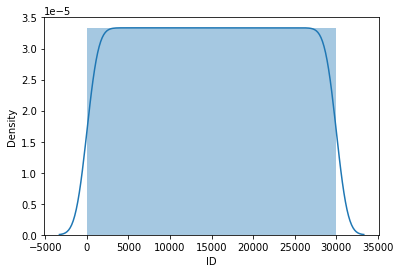

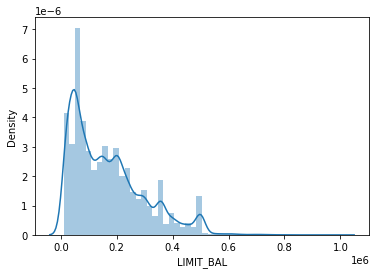

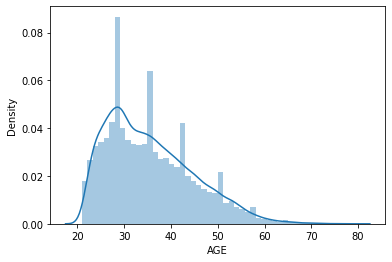

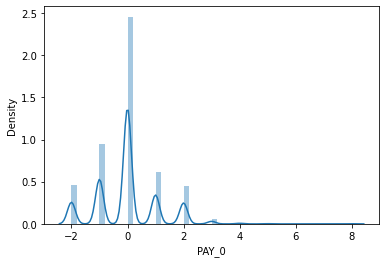

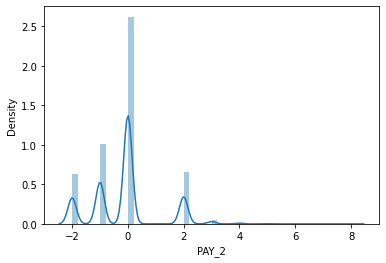

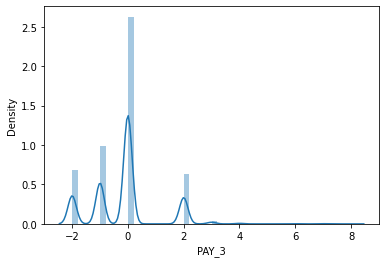

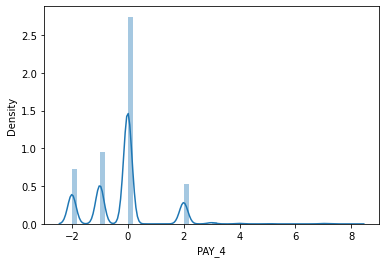

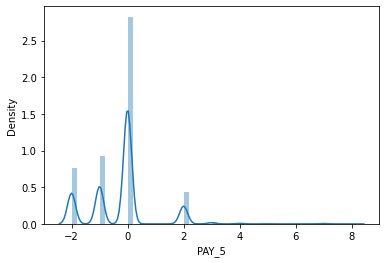

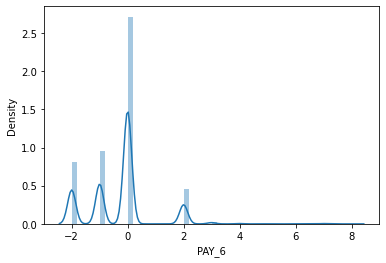

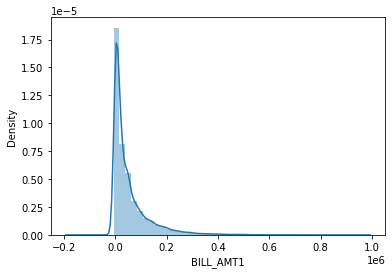

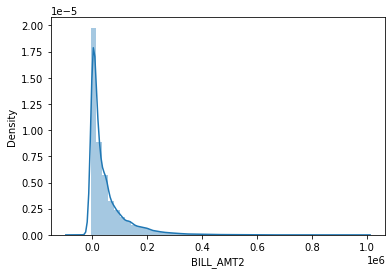

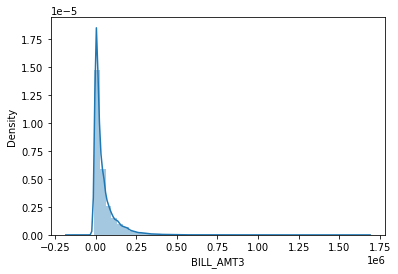

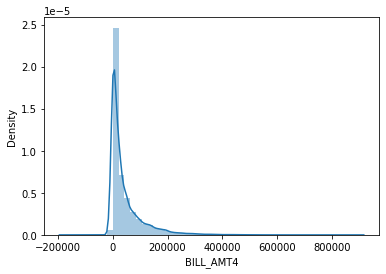

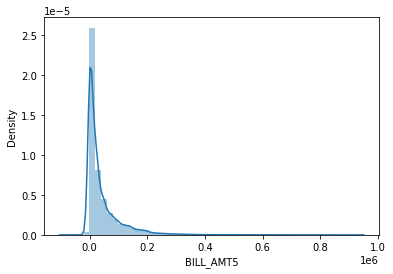

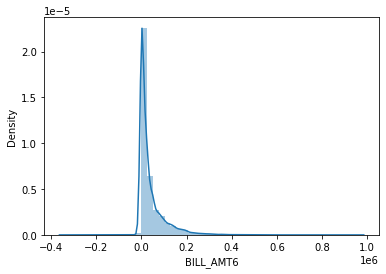

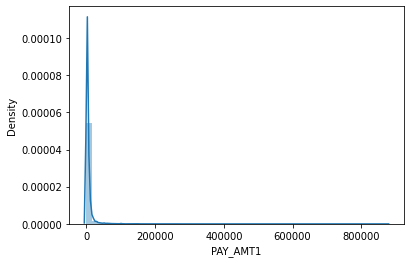

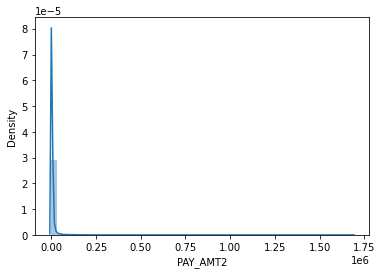

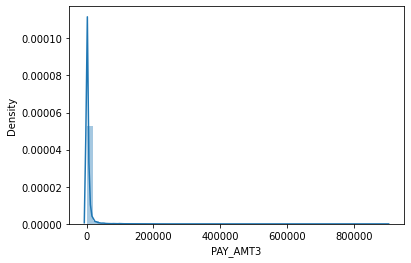

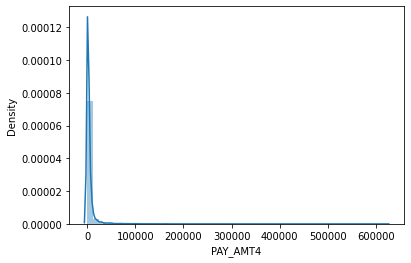

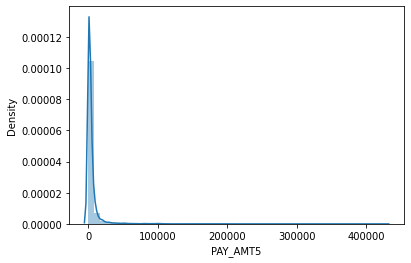

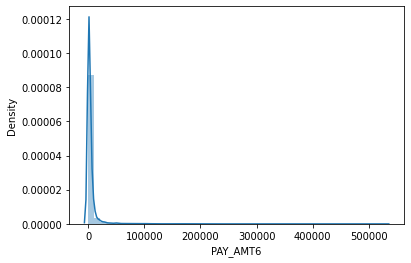

In [ ]:
for i in num:
  sns.distplot(df[i])
  plt.show()

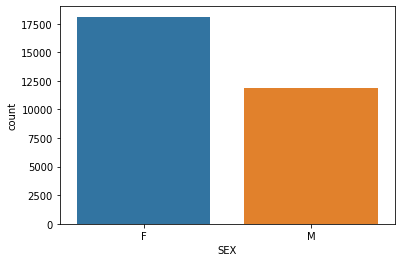

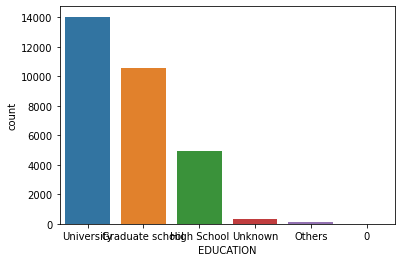

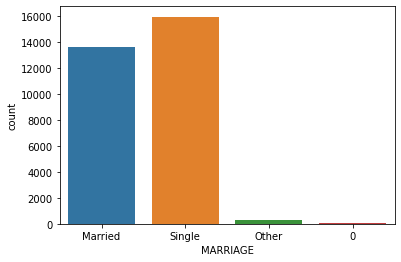

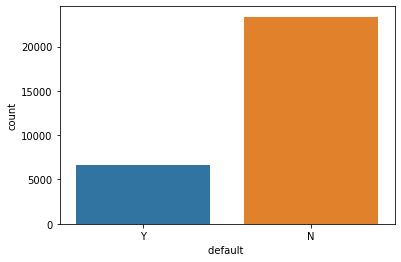

In [ ]:
for i in cat:
  sns.countplot(df[i])
  plt.show()

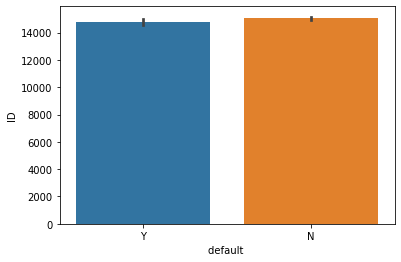

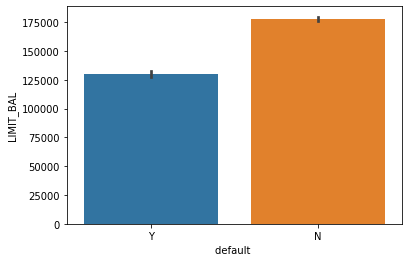

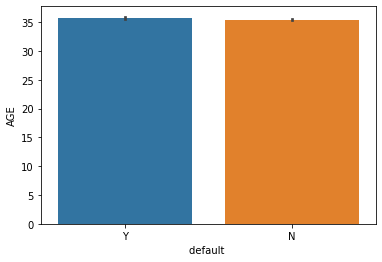

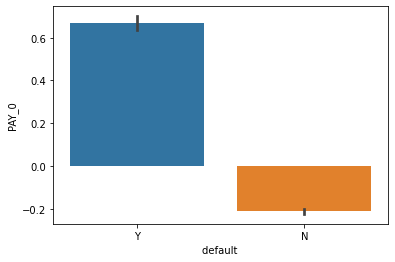

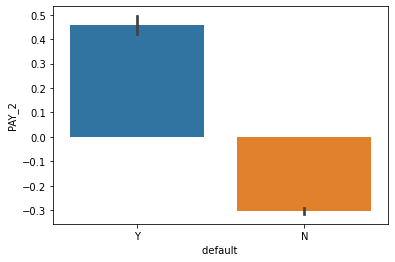

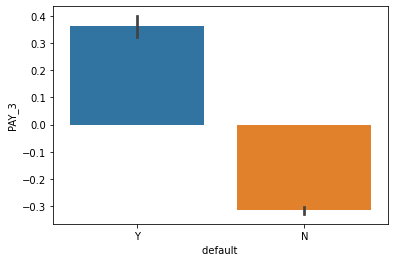

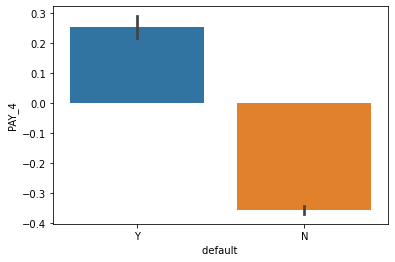

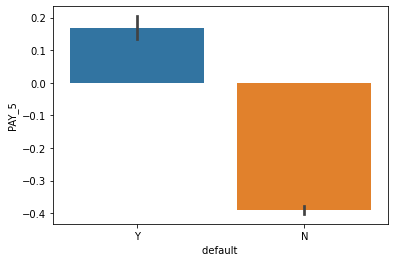

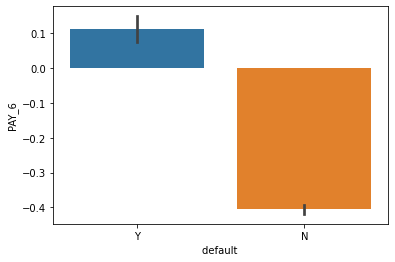

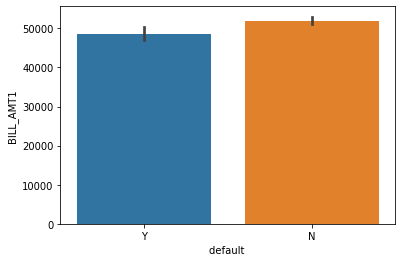

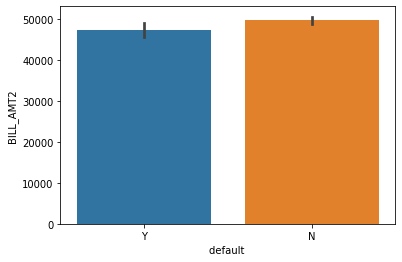

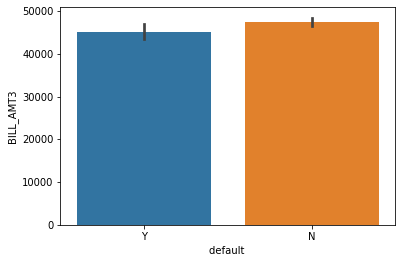

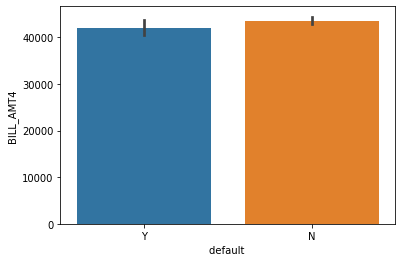

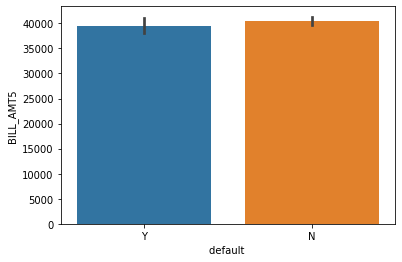

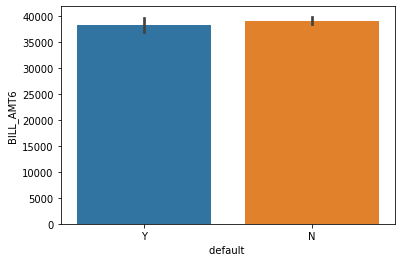

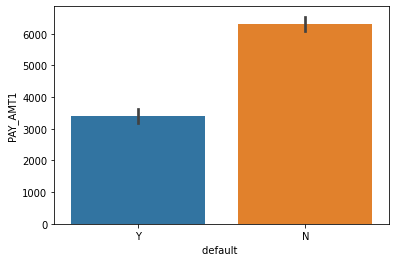

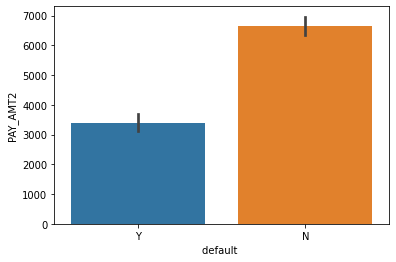

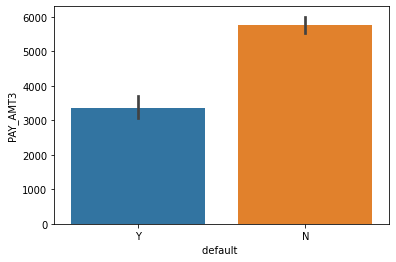

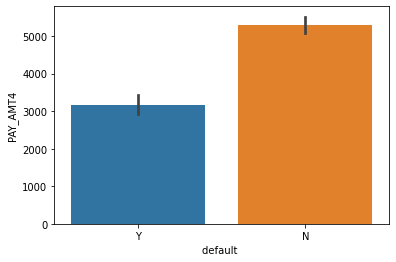

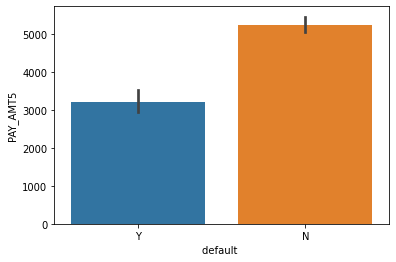

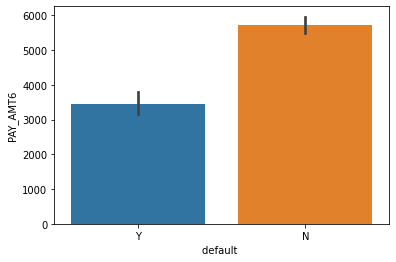

In [ ]:
for i in num:
  sns.barplot(df['default '],df[i])
  plt.show()

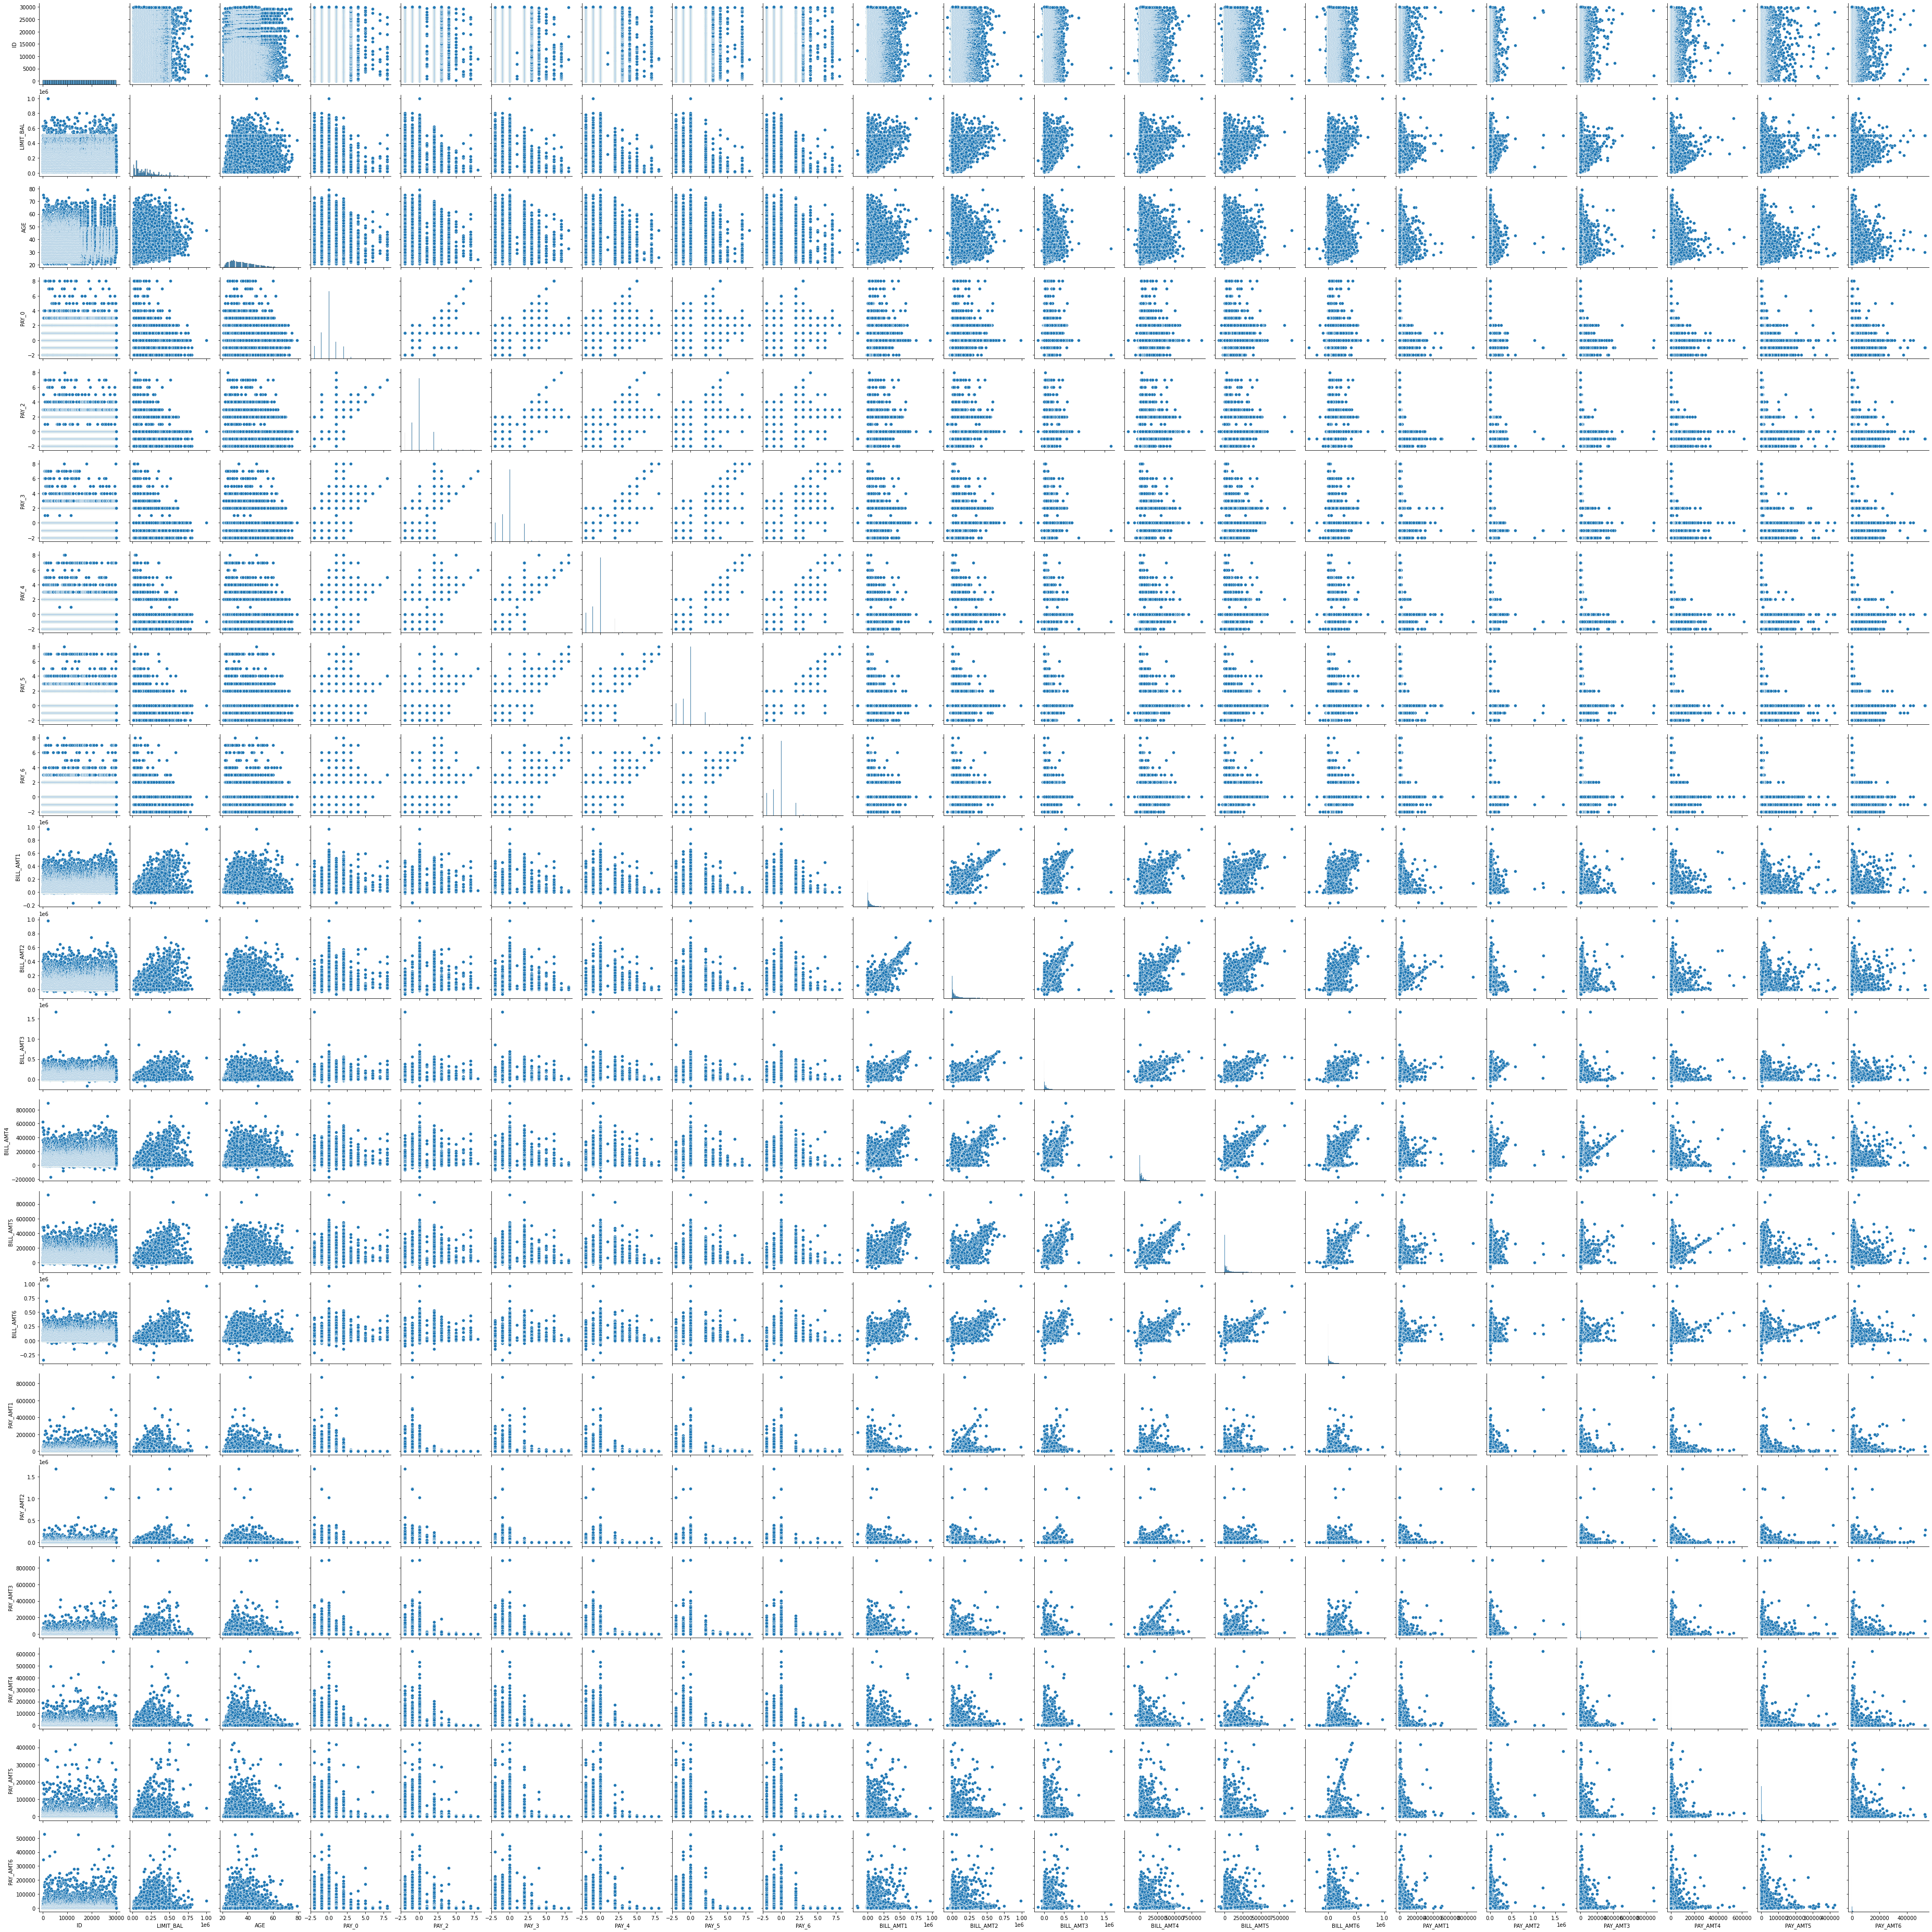

In [ ]:
sns.pairplot(df)

In [ ]:
cor = df.corr()

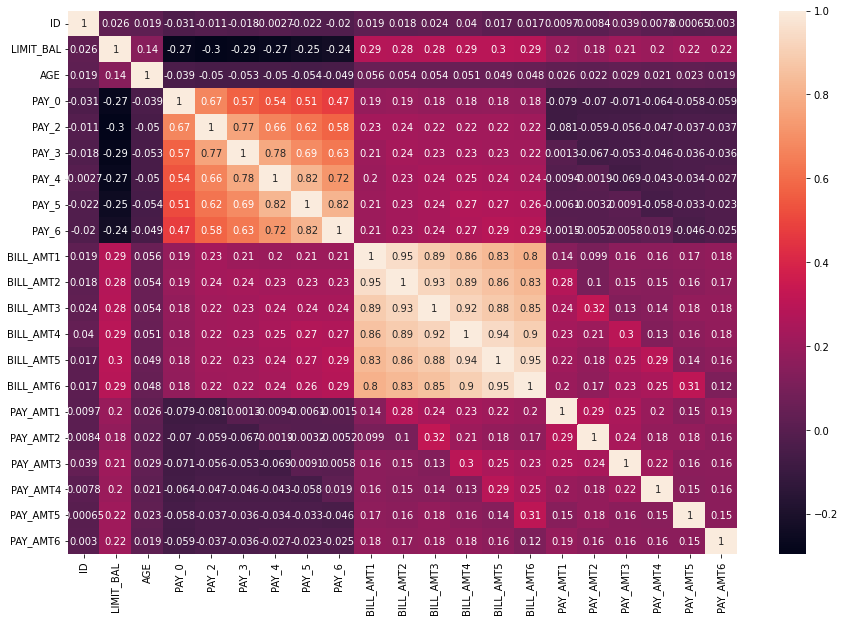

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)

In [ ]:
for i in cat:

  print(i,'\n',df[i].value_counts())
  print()

SEX 
 F    18112
M    11888
Name: SEX, dtype: int64

EDUCATION 
 University         14030
Graduate school    10585
High School         4917
Unknown              331
Others               123
0                     14
Name: EDUCATION, dtype: int64

MARRIAGE 
 Single     15964
Married    13659
Other        323
0             54
Name: MARRIAGE, dtype: int64

default  
 N    23364
Y     6636
Name: default , dtype: int64



In [ ]:
df1 = df.copy()

In [ ]:
cat

['SEX', 'EDUCATION', 'MARRIAGE', 'default ']

In [ ]:
encode_nums = {'SEX':{'F':0,'M':1},'EDUCATION':{'0':'Others'},"MARRIAGE":{'0':'Other'},'default ':{'N':0,'Y':1}}
df1 = df1.replace(encode_nums)

In [ ]:
for i in cat:

  print(i,'\n',df1[i].value_counts())
  print()

SEX 
 0    18112
1    11888
Name: SEX, dtype: int64

EDUCATION 
 University         14030
Graduate school    10585
High School         4917
Unknown              331
Others               137
Name: EDUCATION, dtype: int64

MARRIAGE 
 Single     15964
Married    13659
Other        377
Name: MARRIAGE, dtype: int64

default  
 0    23364
1     6636
Name: default , dtype: int64



In [ ]:
df2 = df1.copy()

In [ ]:
df1 = pd.get_dummies(df1,columns=['EDUCATION','MARRIAGE'],prefix=['edu','mar'],drop_first=True)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df1

ID  LIMIT_BAL  SEX  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
0          1      20000    0   24      2      2     -1     -1     -2     -2   
1          2     120000    0   26     -1      2      0      0      0      2   
2          3      90000    0   34      0      0      0      0      0      0   
3          4      50000    0   37      0      0      0      0      0      0   
4          5      50000    1   57     -1      0     -1      0      0      0   
...      ...        ...  ...  ...    ...    ...    ...    ...    ...    ...   
29995  29996     220000    1   39      0      0      0      0      0      0   
29996  29997     150000    1   43     -1     -1     -1     -1      0      0   
29997  29998      30000    1   37      4      3      2     -1      0      0   
29998  29999      80000    1   41      1     -1      0      0      0     -1   
29999  30000      50000    1   46      0      0      0      0      0      0   

       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0           3913       3102        689          0          0          0   
1           2682       1725       2682       3272       3455       3261   
2          29239      14027      13559      14331      14948      15549   
3          46990      48233      49291      28314      28959      29547   
4           8617       5670      35835      20940      19146      19131   
...          ...        ...        ...        ...        ...        ...   
29995     188948     192815     208365      88004      31237      15980   
29996       1683       1828       3502       8979       5190          0   
29997       3565       3356       2758      20878      20582      19357   
29998      -1645      78379      76304      52774      11855      48944   
29999      47929      48905      49764      36535      32428      15313   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default   \
0             0       689         0         0         0         0         1   
1             0      1000      1000      1000         0      2000         1   
2          1518      1500      1000      1000      1000      5000         0   
3          2000      2019      1200      1100      1069      1000         0   
4          2000     36681     10000      9000       689       679         0   
...         ...       ...       ...       ...       ...       ...       ...   
29995      8500     20000      5003      3047      5000      1000         0   
29996      1837      3526      8998       129         0         0         0   
29997         0         0     22000      4200      2000      3100         1   
29998     85900      3409      1178      1926     52964      1804         1   
29999      2078      1800      1430      1000      1000      1000         1   

       edu_High School  edu_Others  edu_University  edu_Unknown  mar_Other  \
0                    0           0               1            0          0   
1                    0           0               1            0          0   
2                    0           0               1            0          0   
3                    0           0               1            0          0   
4                    0           0               1            0          0   
...                ...         ...             ...          ...        ...   
29995                1           0               0            0          0   
29996                1           0               0            0          0   
29997                0           0               1            0          0   
29998                1           0               0            0          0   
29999                0           0               1            0          0   

       mar_Single  
0               0  
1               1  
2               1  
3               0  
4               0  
...           ...  
29995           0  
29996           1  
29997           1  
29998           0  
29999           0  

[30000 rows x 29 columns]

In [ ]:
y = df1['default ']
x = df1.drop('default ',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE 

In [ ]:
smt = SMOTE()

In [ ]:
x_smote,y_smote = smt.fit_resample(x_train,y_train)

In [ ]:
y_smote.value_counts()

0    18699
1    18699
Name: default , dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_std = std.fit_transform(x_smote)
x_test_std = std.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(x_std,y_smote)

RandomForestClassifier()

In [ ]:
y_pred_rf = model_rf.predict(x_test_std)

In [ ]:
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score,precision_recall_fscore_support,confusion_matrix,ConfusionMatrixDisplay

In [ ]:
def metric(y_test,y_pred):
  print('ROC_AUC :',roc_auc_score(y_test,y_pred))
  print('accuracy_score :',accuracy_score(y_test,y_pred))
  print('recall_score :',recall_score(y_test,y_pred))
  print('precision_recall_fscore_support :',precision_recall_fscore_support(y_test,y_pred))
  cm = confusion_matrix(y_test,y_pred)
  a = ConfusionMatrixDisplay(cm)
  a.plot()

ROC_AUC : 0.6862085576309357
accuracy_score : 0.7951666666666667
recall_score : 0.4898876404494382
precision_recall_fscore_support : (array([0.85806586, 0.54409318]), array([0.88252947, 0.48988764]), array([0.87012575, 0.51556957]), array([4665, 1335]))


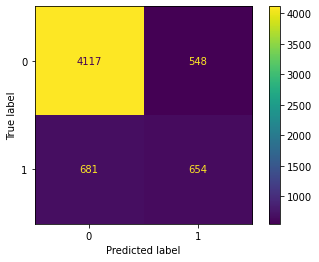

In [ ]:
metric(y_test,y_pred_rf)

In [ ]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(x_std,y_smote)

XGBClassifier()

In [ ]:
y_pred_xg = model_xg.predict(x_test_std)

ROC_AUC : 0.692803208208389
accuracy_score : 0.7705
recall_score : 0.5528089887640449
precision_recall_fscore_support : (array([0.86680054, 0.48616601]), array([0.83279743, 0.55280899]), array([0.84945884, 0.51735016]), array([4665, 1335]))


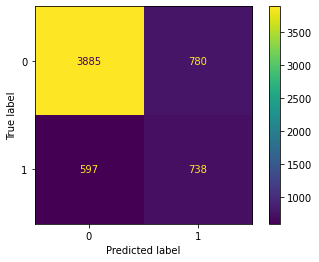

In [ ]:
metric(y_test,y_pred_xg)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
m_rf = RandomForestClassifier()
grid = {'n_estimators':[100,200,300],'max_depth':[3,5,7]}
gcv = GridSearchCV(m_rf,grid,cv=5)

In [ ]:
gcv.fit(x_std,y_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [ ]:
gcv.best_estimator_

RandomForestClassifier(max_depth=7)

In [ ]:
import pandas as pd

DATES = pd.date_range(start='1-Sep-2017', end='15-Sep-2017', freq='D')

print(DATES[2])

2017-09-03 00:00:00


In [ ]:
import pandas as pd

datelist = ['14-Sep-2017', '9-Sep-2017']
dates_to_be_searched = pd.to_datetime(datelist, format='%d-%b-%Y')

print(dates_to_be_searched)


DatetimeIndex(['2017-09-14', '2017-09-09'], dtype='datetime64[ns]', freq=None)


In [ ]:
result = DATES.isin(dates_to_be_searched)

print(result)


[False False False False False False False False  True False False False
 False  True False]


In [ ]:
result = dates_to_be_searched.isin(DATES)

print(result)

[ True  True]


In [ ]:
import pandas as pd

arraylist = [['classA']*5 + ['classB']*5, ['s1', 's2', 's3', 's4', 's5']*2]
mi_index = pd.MultiIndex.from_arrays(arraylist, names=('class', 'student'))

print(mi_index.levels)


[['classA', 'classB'], ['s1', 's2', 's3', 's4', 's5']]
